For problems in trainig, we resize the images and put them in grey scale to have only one channel.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

from PIL import Image
import os

from torchvision import transforms
import torch as th
from torch import Tensor
from torch.utils.data import DataLoader

In [8]:
id_data = pd.read_csv('id_df_final.csv')

In [9]:
class RainDataset(th.utils.data.Dataset):
    def __init__(self, input_data, img_dir, output_dir):
        self.input_data = input_data
        self.img_dir = img_dir
        self.output_dir = output_dir
        self.transform = transforms.Compose([transforms.Resize((128, 128)),transforms.ToTensor()])

    def __getitem__(self, index):
        # Get the row using the index
        row = self.input_data.iloc[index]
        # Define the image path
        img_path = os.path.join(self.img_dir, f"{row['id']}_crop.jpg")
        # Load image with Pillow and convert it to grey scale
        img = Image.open(img_path).convert("L")
        img_tensor = self.transform(img)
        tensor_filename = os.path.join(self.output_dir, f"tensor_{row['id']}.pt")
        th.save(img_tensor, tensor_filename)

        return row['id']

    def __len__(self):
        return self.input_data.shape[0]

In [10]:
output_dir = "../../fast/gray_tensor/"
dataset = RainDataset(id_data, '../../fast/cropped_images/', output_dir)
# apply transform to the dataset
loader = th.utils.data.DataLoader(dataset, batch_size=128, shuffle=False)
j=0
for ids in loader:
    print(f"batch number: {j}")
    j+=1

batch number: 0
batch number: 1
batch number: 2
batch number: 3
batch number: 4
batch number: 5
batch number: 6
batch number: 7
batch number: 8
batch number: 9
batch number: 10
batch number: 11
batch number: 12
batch number: 13
batch number: 14
batch number: 15
batch number: 16
batch number: 17
batch number: 18
batch number: 19
batch number: 20
batch number: 21
batch number: 22
batch number: 23
batch number: 24
batch number: 25
batch number: 26
batch number: 27
batch number: 28
batch number: 29
batch number: 30
batch number: 31
batch number: 32
batch number: 33
batch number: 34
batch number: 35
batch number: 36
batch number: 37
batch number: 38
batch number: 39
batch number: 40
batch number: 41
batch number: 42
batch number: 43
batch number: 44
batch number: 45
batch number: 46
batch number: 47
batch number: 48
batch number: 49
batch number: 50
batch number: 51
batch number: 52
batch number: 53
batch number: 54
batch number: 55
batch number: 56
batch number: 57
batch number: 58
batch n

In [11]:
def print_image(image_path):
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

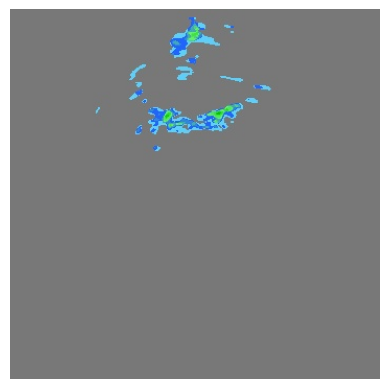

torch.Size([1, 128, 128])


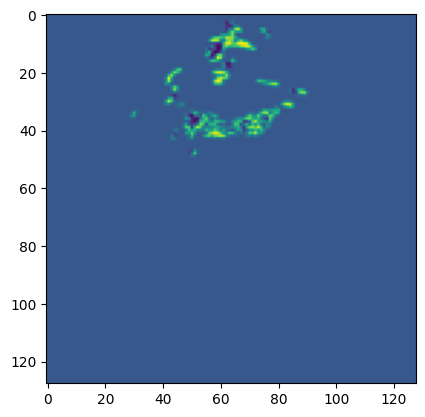

In [19]:
print_image("../../fast/cropped_images/2454880_crop.jpg")
transform = transforms.Compose([transforms.Resize((128, 128)),transforms.ToTensor()])
img = Image.open("../../fast/cropped_images/2454880_crop.jpg").convert("L")
img_tensor = transform(img)
print(img_tensor.shape)
tensor = th.load("../../fast/gray_tensor/tensor_2454880.pt", weights_only=False)
image = transforms.ToPILImage()(tensor)
plt.imshow(image)